In [26]:
import pandas as pd

In [54]:
# dataset from GDELT
# downloaded using Google BigQuery

In [27]:
# first dataset (positive sentiment)

data_pos = pd.read_csv('dataset/jokowi-positive.csv', delimiter=',', encoding='latin-1')

print(data_pos.shape)
data_pos.head()

(400, 2)


,SOURCEURL,AvgTone
0,http://www.beritasatu.com/politik/500735-demok...,2.639296
1,http://www.tribunnews.com/nasional/2018/07/13/...,3.846154
2,http://palembang.tribunnews.com/2018/07/13/but...,2.083333
3,https://www.merdeka.com/peristiwa/nenek-masayu...,2.830189
4,https://news.okezone.com/read/2018/07/12/605/1...,12.389381


In [28]:
#  second dataset (negative sentiment)

data_neg = pd.read_csv('dataset/jokowi-negative.csv', delimiter=',', encoding='latin-1')

print(data_neg.shape)
data_neg.head()

(400, 2)


,SOURCEURL,AvgTone
0,http://www.tribunnews.com/nasional/2018/07/11/...,-2.030457
1,https://nasional.inilah.com/read/detail/246726...,-3.409091
2,https://www.viva.co.id/berita/politik/1052993-...,-4.669261
3,http://www.tribunnews.com/nasional/2018/07/11/...,-2.094241
4,https://nasional.sindonews.com/read/1320900/12...,-2.521008


In [29]:
# concat both dataset

data = pd.concat([data_pos, data_neg])
data.sample(5)

,SOURCEURL,AvgTone
153,https://www.republika.co.id/berita/nasional/um...,-2.508961
296,http://www.thejakartapost.com/news/2018/01/11/...,-5.000000
170,http://soloraya.solopos.com/read/20180730/490/...,-6.185567
23,https://www.republika.co.id/berita/nasional/da...,-2.895753
165,http://makassar.tribunnews.com/2018/07/30/foto...,-2.209945


In [30]:
data = data.sample(frac=1).reset_index(drop=True)
print(data.index)

RangeIndex(start=0, stop=800, step=1)


In [31]:
# add sentiment and sentiment_id columns

data['Sentimen'] = ""

for i in range(len(data['AvgTone'])):
    if data['AvgTone'][i] > 0:
        data['Sentimen'][i] = "positive"
    else:
        data['Sentimen'][i] = "negative"
        
data['Sentimen_id'] = data['Sentimen'].factorize()[0]

data.sample(10)

C:\ProgramData\Anaconda2\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
C:\ProgramData\Anaconda2\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


,SOURCEURL,AvgTone,Sentimen,Sentimen_id
394,https://www.cnnindonesia.com/nasional/20180524...,-4.807692,negative,0
781,http://manado.tribunnews.com/2018/07/24/jokowi...,6.583072,positive,1
239,https://www.viva.co.id/berita/nasional/1052813...,5.343511,positive,1
576,https://www.dw.com/id/kembali-ke-kpk-novel-per...,-5.924855,negative,0
694,http://kupang.tribunnews.com/2018/08/11/sudah-...,6.666667,positive,1
693,http://warungkopi.okezone.com/thread/704826385...,-9.302326,negative,0
214,https://nasional.inilah.com/read/detail/246736...,7.547170,positive,1
653,https://www.thestar.com.my/news/regional/2018/...,-5.035971,negative,0
245,http://www.tribunnews.com/nasional/2018/08/13/...,6.493506,positive,1
71,https://www.merdeka.com/peristiwa/kahiyang-mel...,-3.716216,negative,0


In [32]:
encoded_data, mapping_index = data['Sentimen_id'].factorize()
print(mapping_index)

Int64Index([0, 1], dtype='int64')


In [33]:
for i in range(5):
    print(data['SOURCEURL'][i])

http://www.beritajatim.com/politik_pemerintahan/335652/kiai_sepuh:_jokowi_-_cak_imin_perpaduan_nasionalis_religius.html
https://www.voaindonesia.com/a/jokowi-tetap-dukung-susi-tenggelamkan-kapal-asing-pencuri-ikan/4203153.html
http://www.tribunnews.com/nasional/2018/07/12/jokowi-ingatkan-perwira-tni-polri-tidak-berpolitik-praktis
http://www.harianjogja.com/baca/2018/03/23/korupsi-e-ktp-setnov-tuding-2-menteri-terima-duit-jokowi-diproses-saja-905448
https://nasional.tempo.co/read/1106164/muhaimin-iskandar-klaim-intensif-bertemu-jokowi-bahas-cawapres


In [34]:
# clean sourceurl to readable news headline

for i in range(len(data['SOURCEURL'])):
    list = data['SOURCEURL'][i].replace('.html','').replace('_',' ').replace('-',' ').split('/')
    match = [s for s in list if "jokowi" in s]
    data['SOURCEURL'][i] = match[0].lower()
    
for i in range(5):
    print(data['SOURCEURL'][i])

C:\ProgramData\Anaconda2\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


kiai sepuh: jokowi   cak imin perpaduan nasionalis religius
jokowi tetap dukung susi tenggelamkan kapal asing pencuri ikan
jokowi ingatkan perwira tni polri tidak berpolitik praktis
korupsi e ktp setnov tuding 2 menteri terima duit jokowi diproses saja 905448
muhaimin iskandar klaim intensif bertemu jokowi bahas cawapres


In [35]:
# add new column of total words for headline news (SOURCEURL column)

data['total_words'] = data['SOURCEURL'].apply(lambda x: len(x.split()))
data.head()

,SOURCEURL,AvgTone,Sentimen,Sentimen_id,total_words
0,kiai sepuh: jokowi cak imin perpaduan nasion...,-4.166667,negative,0,8
1,jokowi tetap dukung susi tenggelamkan kapal as...,-5.093379,negative,0,9
2,jokowi ingatkan perwira tni polri tidak berpol...,3.636364,positive,1,8
3,korupsi e ktp setnov tuding 2 menteri terima d...,-2.729292,negative,0,13
4,muhaimin iskandar klaim intensif bertemu jokow...,2.230483,positive,1,8


In [36]:
# removing stopwords

stopwords = pd.read_csv('dataset/indonesian-stopwords-complete.txt', sep=' ', header=None)
stopwords.columns = ['words']
print(stopwords.head())

data['SOURCEURL'] = data['SOURCEURL'].apply(lambda x: ' '.join([item for item in x.split() if not (stopwords.isin([item]).any().words)]))

    words
0     ada
1  adalah
2  adanya
3  adapun
4    agak


In [37]:
# add new column of total words for cleaned headline news (SOURCEURL column)

data['total_words_clean'] = data['SOURCEURL'].apply(lambda x: len(x.split()))
data.head()

,SOURCEURL,AvgTone,Sentimen,Sentimen_id,total_words,total_words_clean
0,kiai sepuh: jokowi cak imin perpaduan nasional...,-4.166667,negative,0,8,8
1,jokowi dukung susi tenggelamkan kapal asing pe...,-5.093379,negative,0,9,8
2,jokowi ingatkan perwira tni polri berpolitik p...,3.636364,positive,1,8,7
3,korupsi e ktp setnov tuding 2 menteri terima d...,-2.729292,negative,0,13,12
4,muhaimin iskandar klaim intensif bertemu jokow...,2.230483,positive,1,8,8


total_words          7337
total_words_clean    6010
dtype: int64


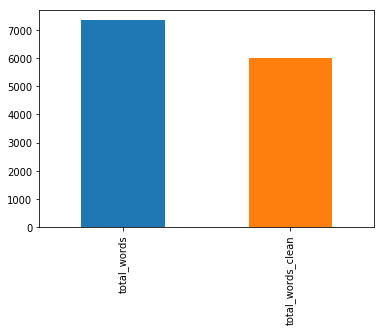

In [38]:
# check before-after data clean

data[['total_words', 'total_words_clean']].sum().plot.bar()
print(data[['total_words', 'total_words_clean']].sum())

negative    400
positive    400
Name: Sentimen, dtype: int64


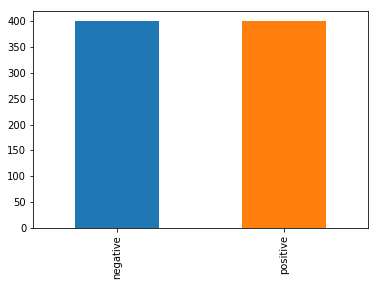

In [39]:
data['Sentimen'].value_counts().plot.bar()
print(data['Sentimen'].value_counts())

In [40]:
used_col = ['SOURCEURL', 'Sentimen', 'Sentimen_id']
data = data[used_col]
data.head()

,SOURCEURL,Sentimen,Sentimen_id
0,kiai sepuh: jokowi cak imin perpaduan nasional...,negative,0
1,jokowi dukung susi tenggelamkan kapal asing pe...,negative,0
2,jokowi ingatkan perwira tni polri berpolitik p...,positive,1
3,korupsi e ktp setnov tuding 2 menteri terima d...,negative,0
4,muhaimin iskandar klaim intensif bertemu jokow...,positive,1


In [48]:
sentimen_id_df = data[['Sentimen', 'Sentimen_id']].drop_duplicates().sort_values('Sentimen_id')
sentimen_to_id = dict(sentimen_id_df.values)
id_to_sentimen = dict(sentimen_id_df[['Sentimen_id', 'Sentimen']].values)

In [42]:
# try a model

from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

X_train, X_test, y_train, y_test = train_test_split(
    data['SOURCEURL'], 
    data['Sentimen_id'],
    random_state=0
)

count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(X_train)

tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)

clf = MultinomialNB().fit(X_train_tfidf, y_train)

In [47]:
# predict a sample

sample2 = data.sample(1)
sentimen = sample2['Sentimen']
headline = data['SOURCEURL'][sample2.index[0]]

print(sentimen)
print(headline)

pred = clf.predict(count_vect.transform([headline]))
sentimen_id = mapping_index[pred][0]
print('\nPrediksi: %s' % (id_to_sentimen[sentimen_id]))

269    negative
Name: Sentimen, dtype: object
p98d8m409 remaja ancam tembak jokowi maaf kpai

Prediksi: negative


## Find the best model

In [49]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(
    sublinear_tf=True,
    min_df=5,
    norm='l2',
    encoding='latin-1',
    ngram_range=(1,2),
    stop_words='english'
)

features = tfidf.fit_transform(data['SOURCEURL']).toarray()
labels = data['Sentimen_id']

features.shape

(800L, 530L)

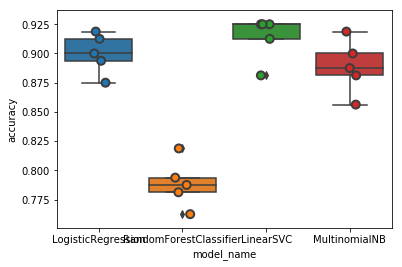

In [50]:
# find the best model

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC

from sklearn.model_selection import cross_val_score

import matplotlib.pyplot as plt

models = [
    LogisticRegression(random_state=0),
    RandomForestClassifier(n_estimators=200,max_depth=3,random_state=0),
    LinearSVC(),
    MultinomialNB()
]

CV = 5
cv_df = pd.DataFrame(index=range(CV * len(models)))

entries = []
for model in models:
    model_name = model.__class__.__name__
    accuracies = cross_val_score(model, features, labels, scoring='accuracy', cv=CV)
    
    for fold_idx, accuracy in enumerate(accuracies):
        entries.append((model_name, fold_idx, accuracy))

cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])

import seaborn as sns

sns.boxplot(x='model_name', y='accuracy', data=cv_df)
sns.stripplot(x='model_name', y='accuracy', data=cv_df, 
              size=8, jitter=True, edgecolor="gray", linewidth=2)
plt.show()

In [51]:
cv_df.groupby('model_name').accuracy.mean()

model_name
LinearSVC                 0.91375
LogisticRegression        0.90000
MultinomialNB             0.88875
RandomForestClassifier    0.78875
Name: accuracy, dtype: float64

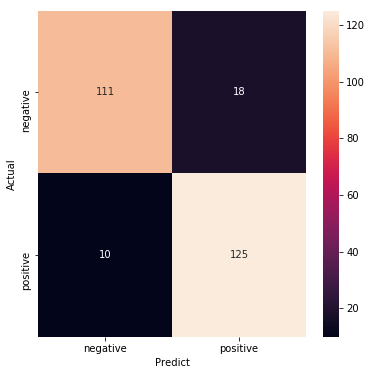

In [52]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

model = LinearSVC()
X_train, X_test, y_train, y_test, indices_train, indidces_test = train_test_split(features, labels, data.index, test_size=0.33, random_state=0)

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

conf_mat = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(6,6))
sns.heatmap(conf_mat, annot=True, fmt='d',
            xticklabels=sentimen_id_df['Sentimen'].values,
            yticklabels=sentimen_id_df['Sentimen'].values)

plt.ylabel('Actual')
plt.xlabel('Predict')
plt.show()

In [53]:
from sklearn import metrics

print(metrics.classification_report(y_test, y_pred, target_names=data['Sentimen'].unique()))

             precision    recall  f1-score   support

   negative       0.92      0.86      0.89       129
   positive       0.87      0.93      0.90       135

avg / total       0.90      0.89      0.89       264

